In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


# Exportación de excel a csv 

In [15]:
# Convertir el archivo de consumo.xlsx a CSV
consumo_df = pd.read_excel('consumo.xlsx')
consumo_df.to_csv('consumo.csv', index=False)

# Convertir el archivo de importacion.xlsx a CSV
importacion_df = pd.read_excel('importacion.xlsx')
importacion_df.to_csv('importacion.csv', index=False)

#haz un csv para cada hoja del excel de precios 
precios_df = pd.read_excel('precios.xlsx', sheet_name=None)

#unir las 4 hojas de precios en un solo dataframe
precios_df = pd.concat(precios_df.values())
precios_df.to_csv('precios.csv', index=False)



print("Archivos CSV creados y limpiados exitosamente.")


Archivos CSV creados y limpiados exitosamente.


# Análisis Exploratorio 

In [16]:
# Filtrar columnas relevantes en consumo y importacion
consumo_filtered = consumo_df[['Fecha', 'Gasolina regular', 'Gasolina superior', 'Diesel bajo azufre', 'Gas licuado de petróleo']]
importacion_filtered = importacion_df[['Fecha', 'Gasolina regular', 'Gasolina superior', 'Diesel bajo azufre', 'Gas licuado de petróleo']]
precios_filtered = precios_df[['FECHA', 'SUPERIOR GTQ/GALON', 'REGULAR GTQ/GALON', 'DIESEL GTQ/GALON', 'GTQ/CIL 25 LB']]

# Renombrar columnas para consistencia
precios_filtered.columns = ['Fecha', 'Gasolina superior', 'Gasolina regular', 'Diesel', 'Gas licuado']

In [17]:
# Convertir a formato datetime
consumo_filtered['Fecha'] = pd.to_datetime(consumo_filtered['Fecha'])
importacion_filtered['Fecha'] = pd.to_datetime(importacion_filtered['Fecha'])
precios_filtered['Fecha'] = pd.to_datetime(precios_filtered['Fecha'])

C:\Users\jsken\AppData\Local\Temp\ipykernel_25832\2397928179.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumo_filtered['Fecha'] = pd.to_datetime(consumo_filtered['Fecha'])
C:\Users\jsken\AppData\Local\Temp\ipykernel_25832\2397928179.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  importacion_filtered['Fecha'] = pd.to_datetime(importacion_filtered['Fecha'])
C:\Users\jsken\AppData\Local\Temp\ipykernel_25832\2397928179.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [21]:
importacion_filtered

,Fecha,Gasolina regular,Gasolina superior,Diesel bajo azufre,Gas licuado de petróleo
0,2001-01-01,177776.50,373963.96,0.00,194065.738095
1,2001-02-01,123115.99,243091.07,0.00,170703.380952
2,2001-03-01,161726.42,312084.38,0.00,161837.371429
3,2001-04-01,127338.74,285054.89,0.00,163048.642857
4,2001-05-01,168730.19,300913.67,0.00,171518.861905
...,...,...,...,...,...
277,2024-02-01,740662.25,650360.11,1236861.75,916541.700000
278,2024-03-01,838270.93,620077.74,1477038.00,675157.480000
279,2024-04-01,886132.77,687017.96,1294706.12,473940.660000
280,2024-05-01,939656.18,696970.30,1470870.09,684864.460000


In [18]:
# Estadísticas descriptivas
print(consumo_filtered.describe())
print(importacion_filtered.describe())
print(precios_filtered.describe())


                               Fecha  Gasolina regular  Gasolina superior  \
count                            294        294.000000         294.000000   
mean   2012-03-16 18:31:50.204081664     387877.634195      465123.002533   
min              2000-01-01 00:00:00     160741.900000      300242.781667   
25%              2006-02-08 00:00:00     214627.297917      382240.402500   
50%              2012-03-16 12:00:00     285343.705000      420304.655000   
75%              2018-04-23 12:00:00     526295.330000      568316.002500   
max              2024-06-01 00:00:00     894533.140000      768102.830000   
std                              NaN     210531.898078      108590.648175   

       Diesel bajo azufre  Gas licuado de petróleo  
count        2.940000e+02               294.000000  
mean         3.043604e+05            313069.932133  
min          0.000000e+00            167818.137897  
25%          0.000000e+00            225904.582202  
50%          0.000000e+00            2626

In [39]:
#valores nulos 
print(consumo_filtered.isnull().sum())
print(importacion_filtered.isnull().sum())
print(precios_filtered.isnull().sum())


Fecha                      0
Gasolina regular           0
Gasolina superior          0
Diesel bajo azufre         0
Gas licuado de petróleo    0
dtype: int64
Fecha                      0
Gasolina regular           0
Gasolina superior          0
Diesel bajo azufre         0
Gas licuado de petróleo    0
Mes                        0
Año                        0
dtype: int64
Fecha                0
Gasolina superior    0
Gasolina regular     0
Diesel               0
Gas licuado          0
dtype: int64


c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

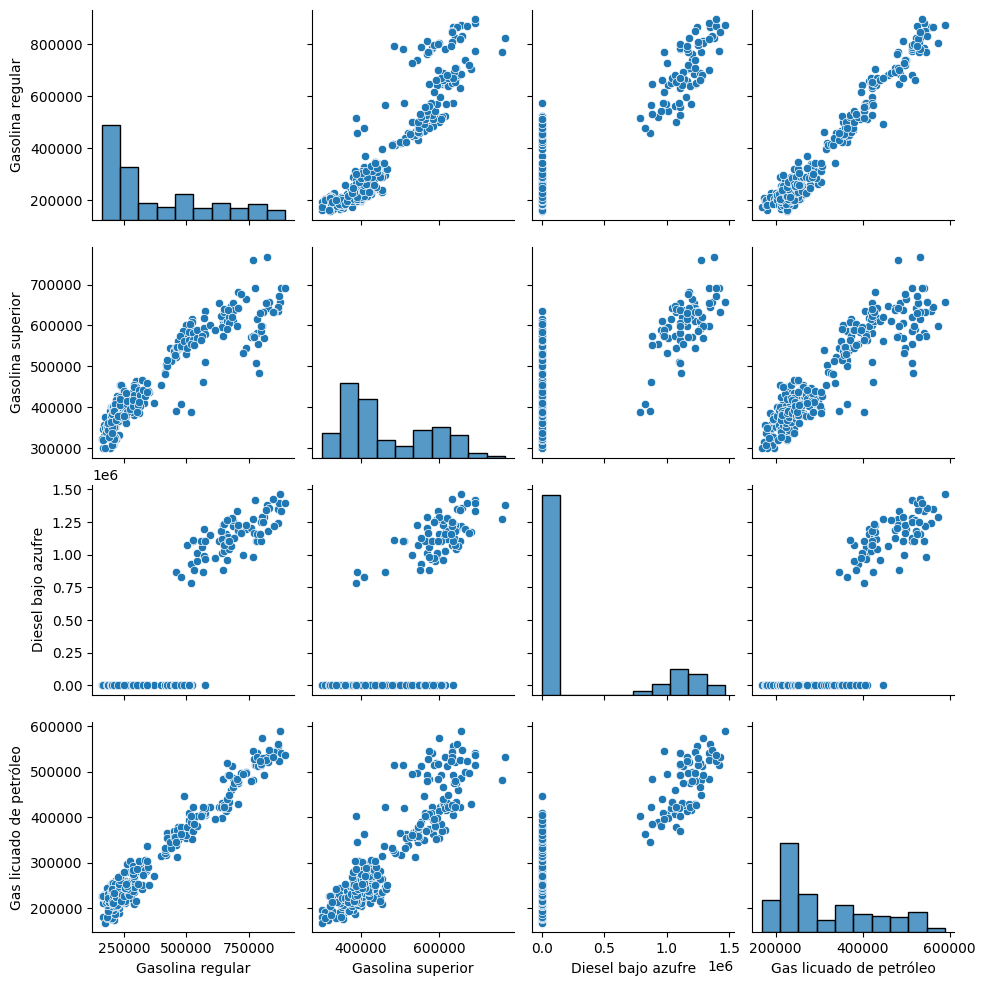

c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

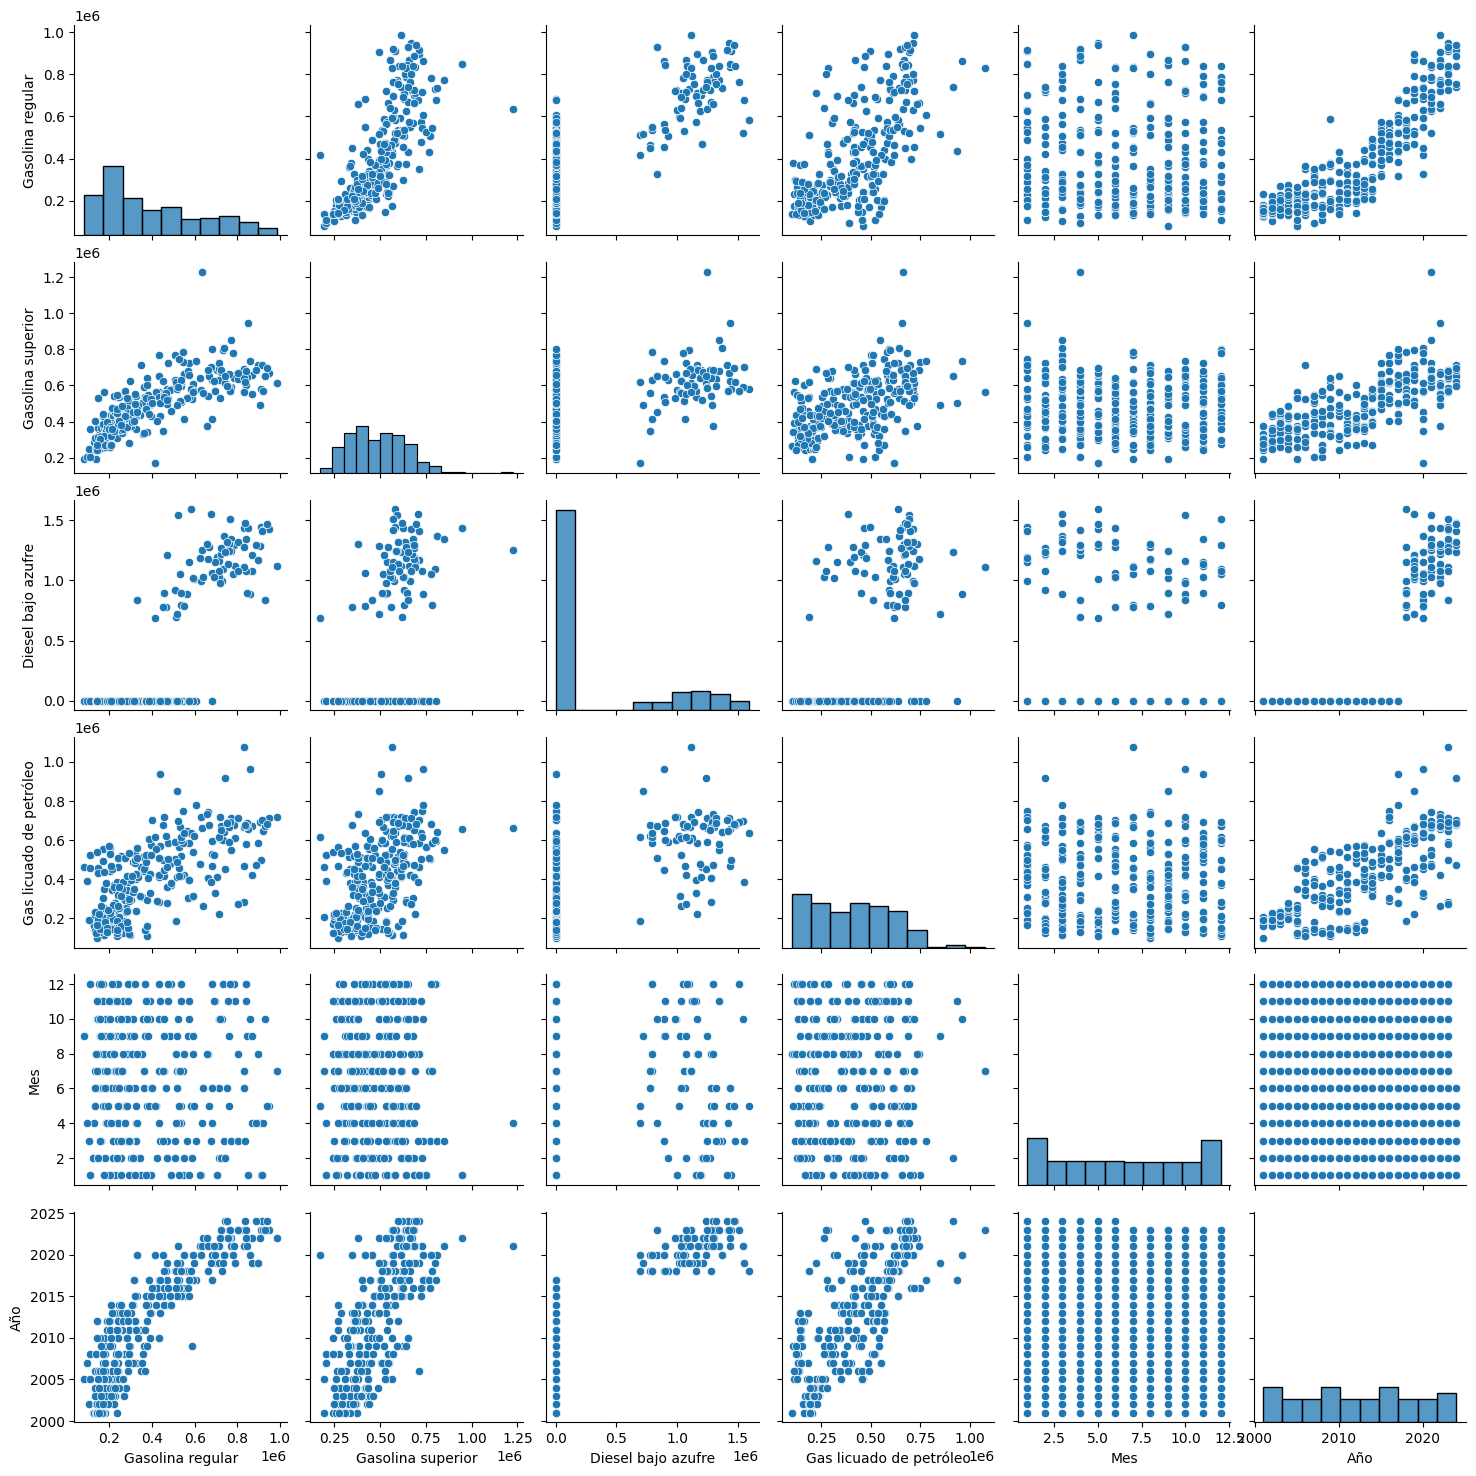

c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

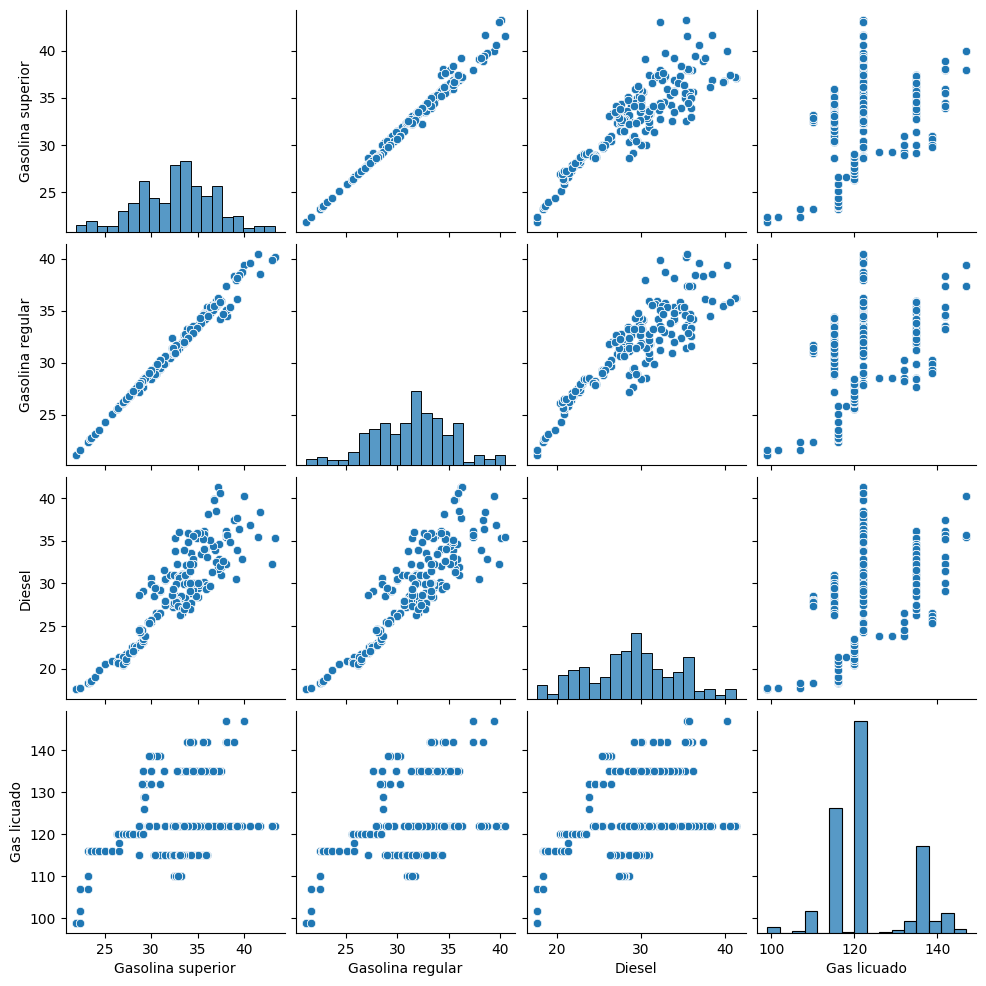

In [38]:
#ver distribuciones de los datos
sns.pairplot(consumo_filtered)
plt.show()

sns.pairplot(importacion_filtered)
plt.show()

sns.pairplot(precios_filtered)
plt.show()

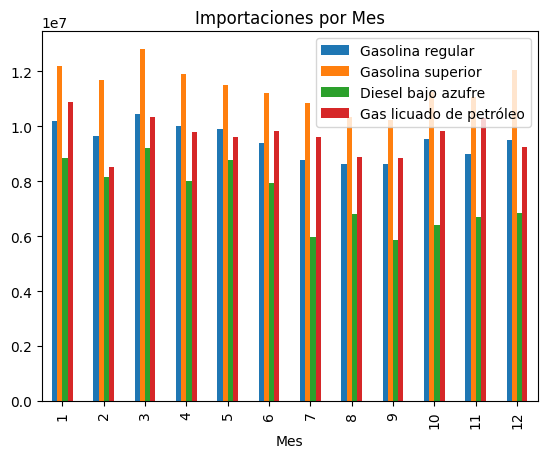

In [24]:
# Excluir las columnas no numéricas antes de la agrupación
importacion_filtered_numeric = importacion_filtered.select_dtypes(include='number')

# Agregar nuevamente las columnas 'Fecha', 'Mes' y 'Año'
importacion_filtered_numeric['Mes'] = importacion_filtered['Mes']
importacion_filtered_numeric['Año'] = importacion_filtered['Año']

# Agrupar por mes y sumar las importaciones (solo columnas numéricas)
importaciones_por_mes = importacion_filtered_numeric.groupby('Mes').sum()

# Visualizar
importaciones_por_mes[['Gasolina regular', 'Gasolina superior', 'Diesel bajo azufre', 'Gas licuado de petróleo']].plot(kind='bar')
plt.title('Importaciones por Mes')
plt.show()

c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

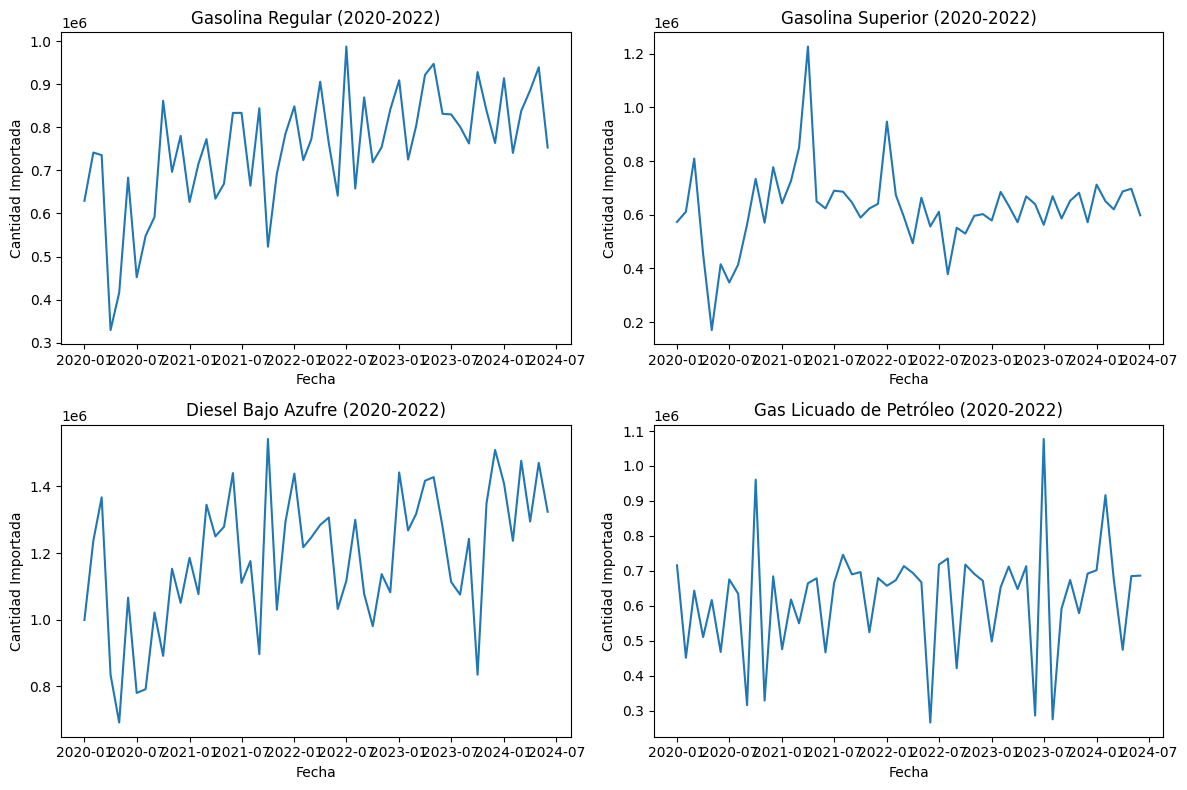

In [28]:
# Filtrar datos de la pandemia (2020-2022)
importacion_filtered_pandemia = importacion_filtered[importacion_filtered['Fecha'].dt.year >= 2020]

# Crear el gráfico de líneas para cada tipo de combustible por separado
plt.figure(figsize=(12, 8))

# Gráfico para Gasolina Regular
plt.subplot(2, 2, 1)
sns.lineplot(data=importacion_filtered_pandemia, x='Fecha', y='Gasolina regular')
plt.title('Gasolina Regular (2020-2022)')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Importada')

# Gráfico para Gasolina Superior
plt.subplot(2, 2, 2)
sns.lineplot(data=importacion_filtered_pandemia, x='Fecha', y='Gasolina superior')
plt.title('Gasolina Superior (2020-2022)')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Importada')

# Gráfico para Diesel Bajo Azufre
plt.subplot(2, 2, 3)
sns.lineplot(data=importacion_filtered_pandemia, x='Fecha', y='Diesel bajo azufre')
plt.title('Diesel Bajo Azufre (2020-2022)')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Importada')

# Gráfico para Gas Licuado de Petróleo
plt.subplot(2, 2, 4)
sns.lineplot(data=importacion_filtered_pandemia, x='Fecha', y='Gas licuado de petróleo')
plt.title('Gas Licuado de Petróleo (2020-2022)')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Importada')

# Ajustar el layout
plt.tight_layout()

# Mostrar los gráficos
plt.show()

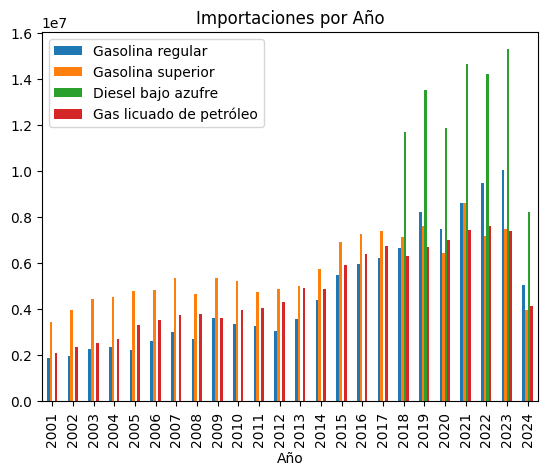

In [29]:
#agrupar or año y sumar las importaciones 
importaciones_por_año = importacion_filtered_numeric.groupby('Año').sum()
importaciones_por_año[['Gasolina regular', 'Gasolina superior', 'Diesel bajo azufre', 'Gas licuado de petróleo']].plot(kind='bar')
plt.title('Importaciones por Año')
plt.show()


In [35]:
#evaluar la normalidad de las distribuciones 
from scipy.stats import shapiro


print("Prueba de Shapiro-Wilk para evaluar la normalidad de las distribuciones de los combustibles en dataset de importacion:")
# Test de Shapiro-Wilk para Gasolina Regular
stat, p = shapiro(importacion_filtered['Gasolina regular'])
print('Gasolina Regular:', 'stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('La muestra parece provenir de una distribución normal')
else:
    print('La muestra no parece provenir de una distribución normal')

# Test de Shapiro-Wilk para Gasolina Superior
stat, p = shapiro(importacion_filtered['Gasolina superior'])
print('Gasolina Superior:', 'stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('La muestra parece provenir de una distribución normal')
else:
    print('La muestra no parece provenir de una distribución normal')

# Test de Shapiro-Wilk para Diesel Bajo Azufre
stat, p = shapiro(importacion_filtered['Diesel bajo azufre'])
print('Diesel Bajo Azufre:', 'stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('La muestra parece provenir de una distribución normal')
else:
    print('La muestra no parece provenir de una distribución normal')

# Test de Shapiro-Wilk para Gas Licuado de Petróleo
stat, p = shapiro(importacion_filtered['Gas licuado de petróleo'])
print('Gas Licuado de Petróleo:', 'stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('La muestra parece provenir de una distribución normal')
else:
    print('La muestra no parece provenir de una distribución normal')

    


Prueba de Shapiro-Wilk para evaluar la normalidad de las distribuciones de los combustibles en dataset de importacion:
Gasolina Regular: stat=0.903, p=0.000
La muestra no parece provenir de una distribución normal
Gasolina Superior: stat=0.972, p=0.000
La muestra no parece provenir de una distribución normal
Diesel Bajo Azufre: stat=0.614, p=0.000
La muestra no parece provenir de una distribución normal
Gas Licuado de Petróleo: stat=0.957, p=0.000
La muestra no parece provenir de una distribución normal


In [36]:
#test de normalidad para los precios

print("Prueba de Shapiro-Wilk para evaluar la normalidad de las distribuciones de los precios en dataset de precios:")

# Test de Shapiro-Wilk para Gasolina Regular
stat, p = shapiro(precios_filtered['Gasolina regular'])
print('Gasolina Regular:', 'stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('La muestra parece provenir de una distribución normal')
else:
    print('La muestra no parece provenir de una distribución normal')

# Test de Shapiro-Wilk para Gasolina Superior
stat, p = shapiro(precios_filtered['Gasolina superior'])
print('Gasolina Superior:', 'stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('La muestra parece provenir de una distribución normal')

else:
    print('La muestra no parece provenir de una distribución normal')

# Test de Shapiro-Wilk para Diesel
stat, p = shapiro(precios_filtered['Diesel'])
print('Diesel:', 'stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('La muestra parece provenir de una distribución normal')
else:
    print('La muestra no parece provenir de una distribución normal')

# Test de Shapiro-Wilk para Gas Licuado
stat, p = shapiro(precios_filtered['Gas licuado'])
print('Gas Licuado:', 'stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('La muestra parece provenir de una distribución normal')
else:
    print('La muestra no parece provenir de una distribución normal')
    

Prueba de Shapiro-Wilk para evaluar la normalidad de las distribuciones de los precios en dataset de precios:
Gasolina Regular: stat=0.990, p=0.000
La muestra no parece provenir de una distribución normal
Gasolina Superior: stat=0.991, p=0.000
La muestra no parece provenir de una distribución normal
Diesel: stat=0.988, p=0.000
La muestra no parece provenir de una distribución normal
Gas Licuado: stat=0.898, p=0.000
La muestra no parece provenir de una distribución normal


In [37]:
#test de normalidad para consumo 

print("Prueba de Shapiro-Wilk para evaluar la normalidad de las distribuciones de los consumos en dataset de consumo:")
# Test de Shapiro-Wilk para Gasolina Regular
stat, p = shapiro(consumo_filtered['Gasolina regular'])
print('Gasolina Regular:', 'stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('La muestra parece provenir de una distribución normal')
else:
    print('La muestra no parece provenir de una distribución normal')

# Test de Shapiro-Wilk para Gasolina Superior
stat, p = shapiro(consumo_filtered['Gasolina superior'])
print('Gasolina Superior:', 'stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('La muestra parece provenir de una distribución normal')
else:
    print('La muestra no parece provenir de una distribución normal')

# Test de Shapiro-Wilk para Diesel Bajo Azufre
stat, p = shapiro(consumo_filtered['Diesel bajo azufre'])
print('Diesel Bajo Azufre:', 'stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('La muestra parece provenir de una distribución normal')
else:
    print('La muestra no parece provenir de una distribución normal')

# Test de Shapiro-Wilk para Gas Licuado de Petróleo
stat, p = shapiro(consumo_filtered['Gas licuado de petróleo'])
print('Gas Licuado de Petróleo:', 'stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('La muestra parece provenir de una distribución normal')
else:
    print('La muestra no parece provenir de una distribución normal')

    

Prueba de Shapiro-Wilk para evaluar la normalidad de las distribuciones de los consumos en dataset de consumo:
Gasolina Regular: stat=0.843, p=0.000
La muestra no parece provenir de una distribución normal
Gasolina Superior: stat=0.911, p=0.000
La muestra no parece provenir de una distribución normal
Diesel Bajo Azufre: stat=0.592, p=0.000
La muestra no parece provenir de una distribución normal
Gas Licuado de Petróleo: stat=0.883, p=0.000
La muestra no parece provenir de una distribución normal


# Seleccion de series a utilizar 
## Consumo de gasolina super 

In [44]:
#identificar el inicio, fin(fecha) y frecuenca de la serie consumo de gasolina super

print("Inicio de la serie de consumo de Gasolina Superior:", consumo_filtered['Fecha'].min())
print("Fin de la serie de consumo de Gasolina Superior:", consumo_filtered['Fecha'].max())
#dame frecuencias de la serie
print("Frecuencia de la serie de consumo de Gasolina Superior:", consumo_filtered['Fecha'].diff().mode().values[0])


Inicio de la serie de consumo de Gasolina Superior: 2000-01-01 00:00:00
Fin de la serie de consumo de Gasolina Superior: 2024-06-01 00:00:00
Frecuencia de la serie de consumo de Gasolina Superior: 2678400000000000 nanoseconds


c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

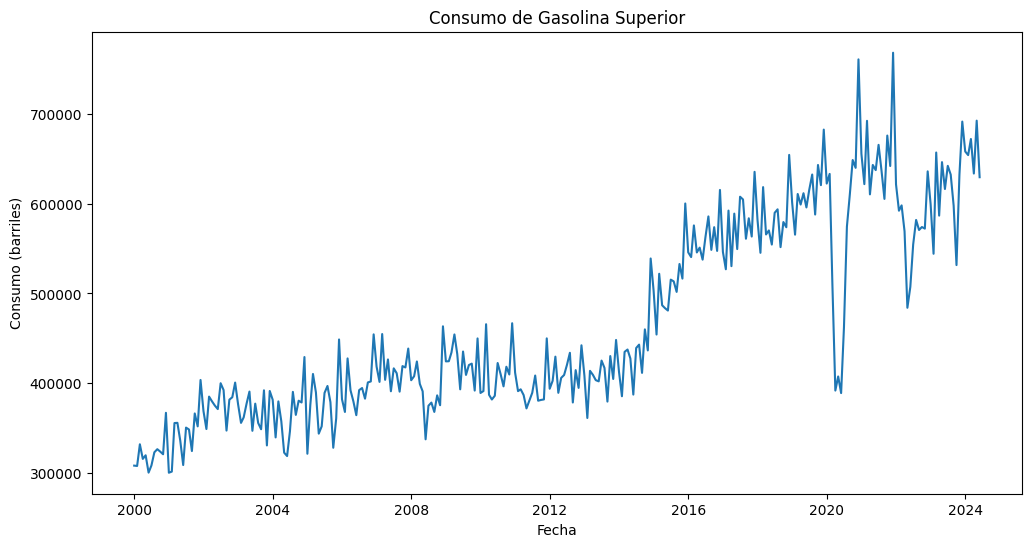

In [45]:
#grafico de la serie 
plt.figure(figsize=(12, 6))
sns.lineplot(data=consumo_filtered, x='Fecha', y='Gasolina superior')
plt.title('Consumo de Gasolina Superior')
plt.xlabel('Fecha')
plt.ylabel('Consumo (barriles)')
plt.show()


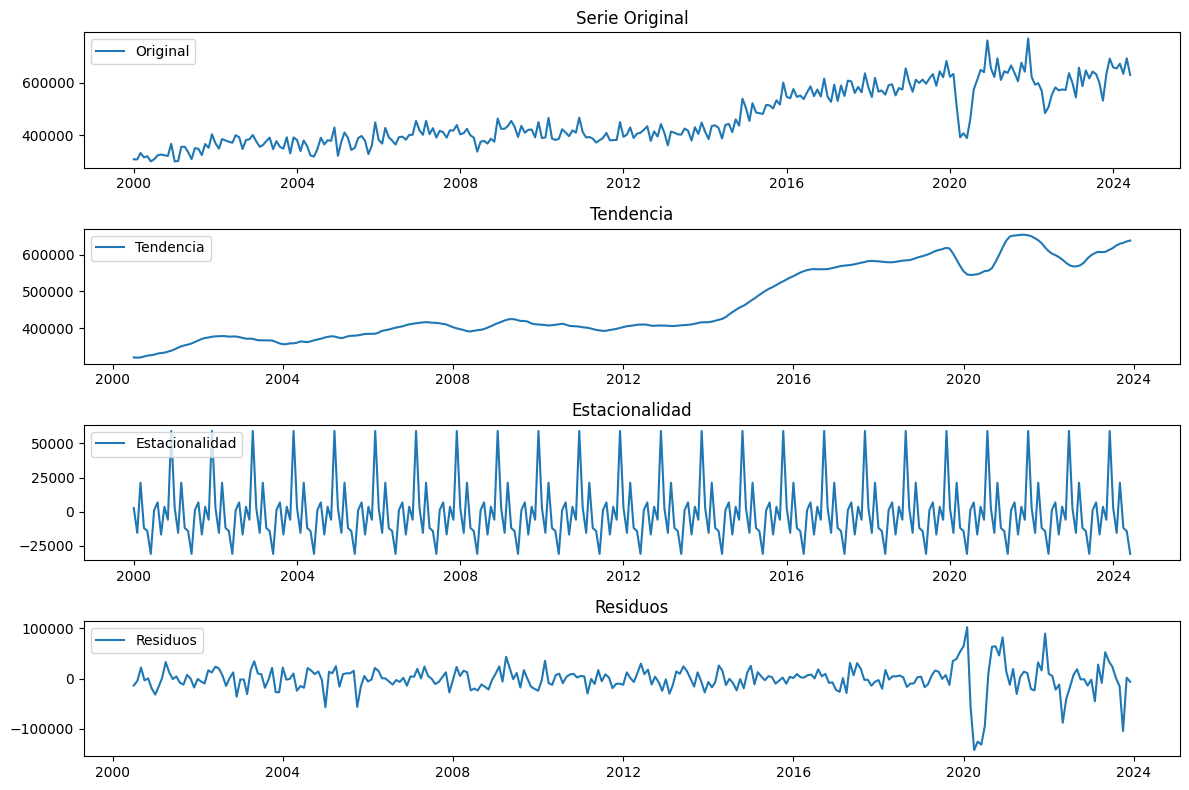

In [46]:
#Descomponga la serie. Teniendo en cuenta el diagrama de la serie y sus  componentes  discuta  si  es  posible  hablar  de  estacionariedad  en  media  y  en  varianza.

from statsmodels.tsa.seasonal import seasonal_decompose

# Descomposición de la serie de tiempo
decomposition = seasonal_decompose(consumo_filtered['Gasolina superior'], model='additive', period=12)

# Gráficos de la descomposición
plt.figure(figsize=(12, 8))

# Serie original
plt.subplot(4, 1, 1)
plt.plot(consumo_filtered['Fecha'], consumo_filtered['Gasolina superior'], label='Original')
plt.legend(loc='upper left')
plt.title('Serie Original')

# Tendencia 
plt.subplot(4, 1, 2)
plt.plot(consumo_filtered['Fecha'], decomposition.trend, label='Tendencia')
plt.legend(loc='upper left')
plt.title('Tendencia')

# Estacionalidad
plt.subplot(4, 1, 3)
plt.plot(consumo_filtered['Fecha'], decomposition.seasonal, label='Estacionalidad')
plt.legend(loc='upper left')
plt.title('Estacionalidad')

# Residuos
plt.subplot(4, 1, 4)
plt.plot(consumo_filtered['Fecha'], decomposition.resid, label='Residuos')
plt.legend(loc='upper left')
plt.title('Residuos')

# Ajustar el layout
plt.tight_layout()

# Mostrar los gráficos
plt.show()


In [48]:
#Elejir parametros para el modelo ARIMA
from statsmodels.tsa.stattools import adfuller

# Diferenciar la serie para hacerla estacionaria
consumo_filtered['Gasolina superior_diff'] = consumo_filtered['Gasolina superior'].diff().dropna()

# Test de Dickey-Fuller para la serie diferenciada
result_diff = adfuller(consumo_filtered['Gasolina superior_diff'].dropna())
print('ADF Statistic (diferenciada):', result_diff[0])
print('p-value (diferenciada):', result_diff[1])
print('Critical Values (diferenciada):', result_diff[4])



ADF Statistic (diferenciada): -4.678687434319395
p-value (diferenciada): 9.226248660659854e-05
Critical Values (diferenciada): {'1%': -3.4542672521624214, '5%': -2.87206958769775, '10%': -2.5723807881747534}


C:\Users\jsken\AppData\Local\Temp\ipykernel_25832\1850145030.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumo_filtered['Gasolina superior_diff'] = consumo_filtered['Gasolina superior'].diff().dropna()


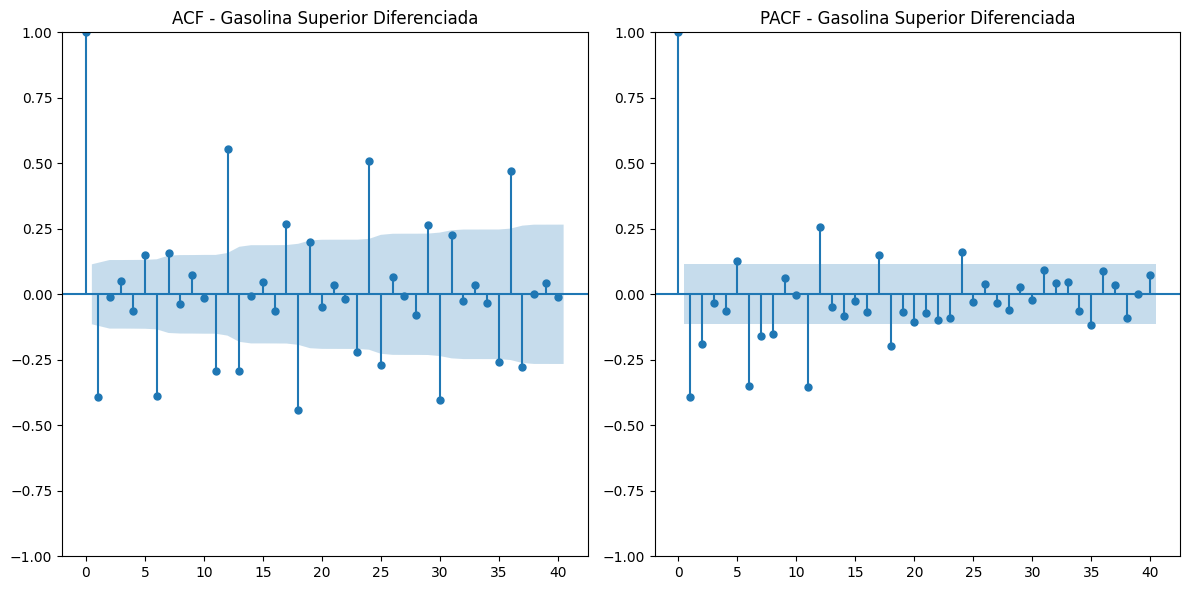

In [50]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Graficar ACF y PACF para la serie diferenciada
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_acf(consumo_filtered['Gasolina superior_diff'].dropna(), lags=40, ax=plt.gca())
plt.title('ACF - Gasolina Superior Diferenciada')

plt.subplot(1, 2, 2)
plot_pacf(consumo_filtered['Gasolina superior_diff'].dropna(), lags=40, ax=plt.gca())
plt.title('PACF - Gasolina Superior Diferenciada')

plt.tight_layout()
plt.show()

In [134]:
#uso de auto arima para encontrar los parametros del modelo
from pmdarima import auto_arima

# Encontrar los parámetros óptimos del modelo ARIMA
model = auto_arima(consumo_filtered['Gasolina superior'], seasonal=True, m=12, stepwise=True, suppress_warnings=True, trace=True)
model.summary()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.96 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=7081.056, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=6991.097, Time=0.11 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=7005.017, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=7079.252, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=7041.819, Time=0.03 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=6974.289, Time=0.25 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=6964.219, Time=0.38 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=6964.716, Time=0.15 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=6961.885, Time=0.75 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=6965.151, Time=0.35 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=6985.919, Time=0.63 sec
 ARIMA(2,1,0)(2,0,2)[12] intercept   : AIC=6960.644, Time=0.92 sec
 ARIMA(2,1,0)(1,0,2)[12] intercept   : AIC=6964.713, Time=0.41 sec
 ARIMA(2,1,0)(2,0,1)[12]

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  294
Model:             SARIMAX(2, 1, 0)x(1, 0, [1], 12)   Log Likelihood               -3470.069
Date:                              Sun, 18 Aug 2024   AIC                           6950.137
Time:                                      22:31:05   BIC                           6968.538
Sample:                                           0   HQIC                          6957.507
                                              - 294                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2358      0.044     -5.417      0.000      -0.321      -0.151
ar.L2         -0.0504      0.072     -0.700      0.484      -0.191       0.091
ar.S.L12       0.9572      0.042     22.979      0.000       0.876       1.039
ma.S.L12      -0.8310      0.085     -9.788      0.000      -0.997      -0.665
sigma2      1.486e+09   7.45e-12      2e+20      0.000    1.49e+09    1.49e+09
===================================================================================
Ljung-Box (L1) (Q):                   1.95   Jarque-Bera (JB):               200.44
Prob(Q):                              0.16   Prob(JB):                         0.00
Heteroskedasticity (H):               1.68   Skew:                            -0.62
Prob(H) (two-sided):                  0.01   Kurtosis:                         6.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.22e+35. Standard errors may be unstable.
"""

In [135]:
from statsmodels.tsa.arima.model import ARIMA

# Ajustar el modelo ARIMA con los parámetros p, d, q
p = 2  # Ajusta según el gráfico de PACF
d = 1  # Ya definido como 1 para la diferenciación
q = 0  # Ajusta según el gráfico de ACF

model = ARIMA(consumo_filtered['Gasolina superior'], order=(p, d, q))
model_fit = model.fit()

# Resumen del modelo
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:      Gasolina superior   No. Observations:                  294
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -3514.821
Date:                Sun, 18 Aug 2024   AIC                           7035.642
Time:                        22:31:25   BIC                           7046.682
Sample:                             0   HQIC                          7040.064
                                - 294                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3953      0.033    -11.828      0.000      -0.461      -0.330
ar.L2         -0.1431      0.041     -3.493      0.000      -0.223      -0.063
sigma2      1.486e+09   8.75e-12    1.7e+20      0.0

Mean Squared Error: 5513960992.684404


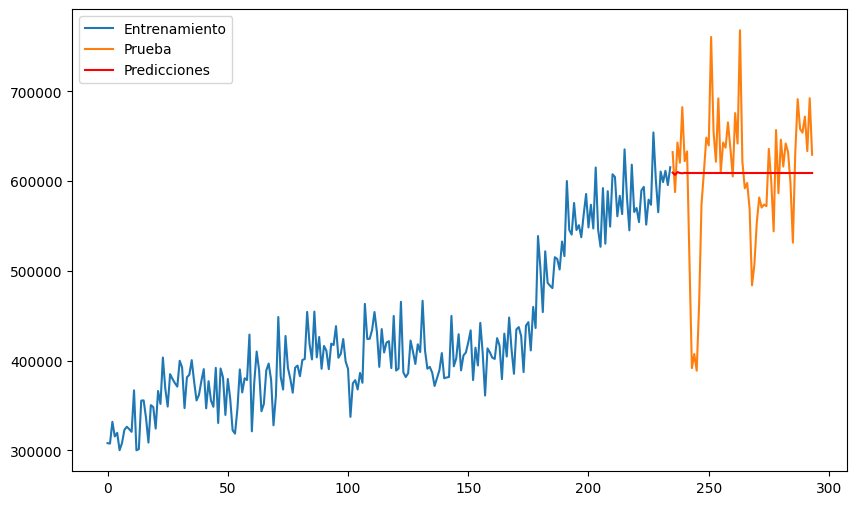

In [137]:

from sklearn.metrics import mean_squared_error
#validar el modelo
# Dividir los datos en entrenamiento y prueba
train_size = int(len(consumo_filtered) * 0.8)
train, test = consumo_filtered['Gasolina superior'][:train_size], consumo_filtered['Gasolina superior'][train_size:]

# Ajustar el modelo ARIMA con los parámetros p, d, q
p = 2  # Ajusta según el gráfico de PACF
d = 1  # Ya definido como 1 para la diferenciación
q = 0  # Ajusta según el gráfico de ACF

model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()

# Realizar prediccionessolo de los ultimos 3 años
predictions = model_fit.forecast(steps=len(test))


# Calcular el error de predicción
error = mean_squared_error(test, predictions)
print(f'Mean Squared Error: {error}')

# Visualizar las predicciones
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Entrenamiento')
plt.plot(test.index, test, label='Prueba')
plt.plot(test.index, predictions, label='Predicciones', color='red')
plt.legend()
plt.show()


## Precios de gasolina super

In [64]:
#identificar el inicio, fin(fecha) y frecuenca de la serie precio de gasolina super

print("Inicio de la serie de precio de Gasolina Superior:", precios_filtered['Fecha'].min())
print("Fin de la serie de precio de Gasolina Superior:", precios_filtered['Fecha'].max())
#dame frecuencias de la serie
print("Frecuencia de la serie de precio de Gasolina Superior:", precios_filtered['Fecha'].diff().mode().values[0])


Inicio de la serie de consumo de Gasolina Superior: 2000-01-01 00:00:00
Fin de la serie de consumo de Gasolina Superior: 2024-06-01 00:00:00
Frecuencia de la serie de consumo de Gasolina Superior: 2678400000000000 nanoseconds


c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

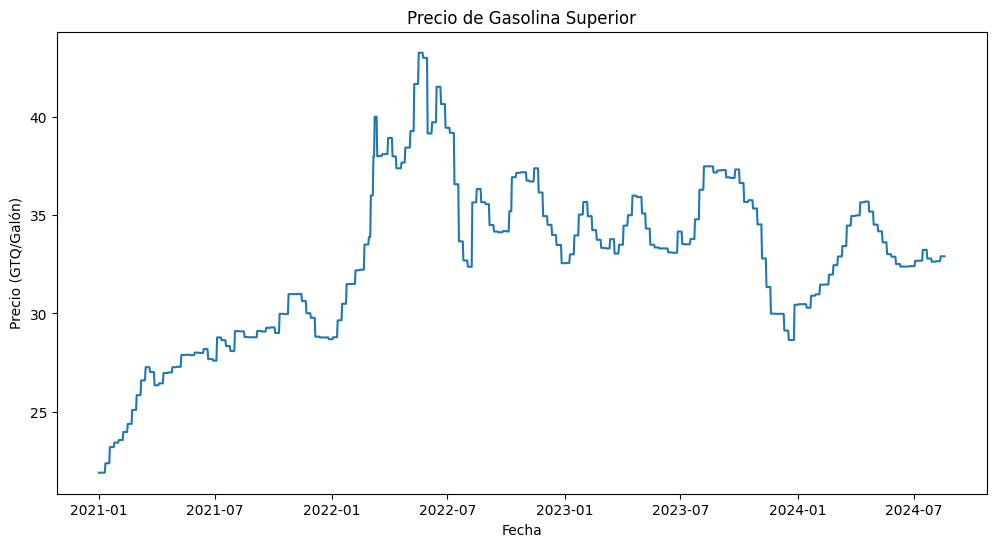

In [66]:
#grafico de la serie
plt.figure(figsize=(12, 6))
sns.lineplot(data=precios_filtered, x='Fecha', y='Gasolina superior')
plt.title('Precio de Gasolina Superior')
plt.xlabel('Fecha')
plt.ylabel('Precio (GTQ/Galón)')
plt.show()


In [74]:
# ordenar el dataframe por fecha
precios_filtered = precios_filtered.sort_values('Fecha')

precios_filtered

,Fecha,Gasolina superior,Gasolina regular,Diesel,Gas licuado
0,2021-01-01,21.91,21.11,17.61,99.0
1,2021-01-02,21.91,21.11,17.61,99.0
2,2021-01-03,21.91,21.11,17.61,99.0
3,2021-01-04,21.91,21.11,17.61,99.0
4,2021-01-05,21.91,21.11,17.61,99.0
...,...,...,...,...,...
226,2024-08-14,32.90,31.41,27.34,110.0
227,2024-08-15,32.90,31.41,27.34,110.0
228,2024-08-16,32.90,31.41,27.34,110.0
229,2024-08-17,32.90,31.41,27.34,110.0


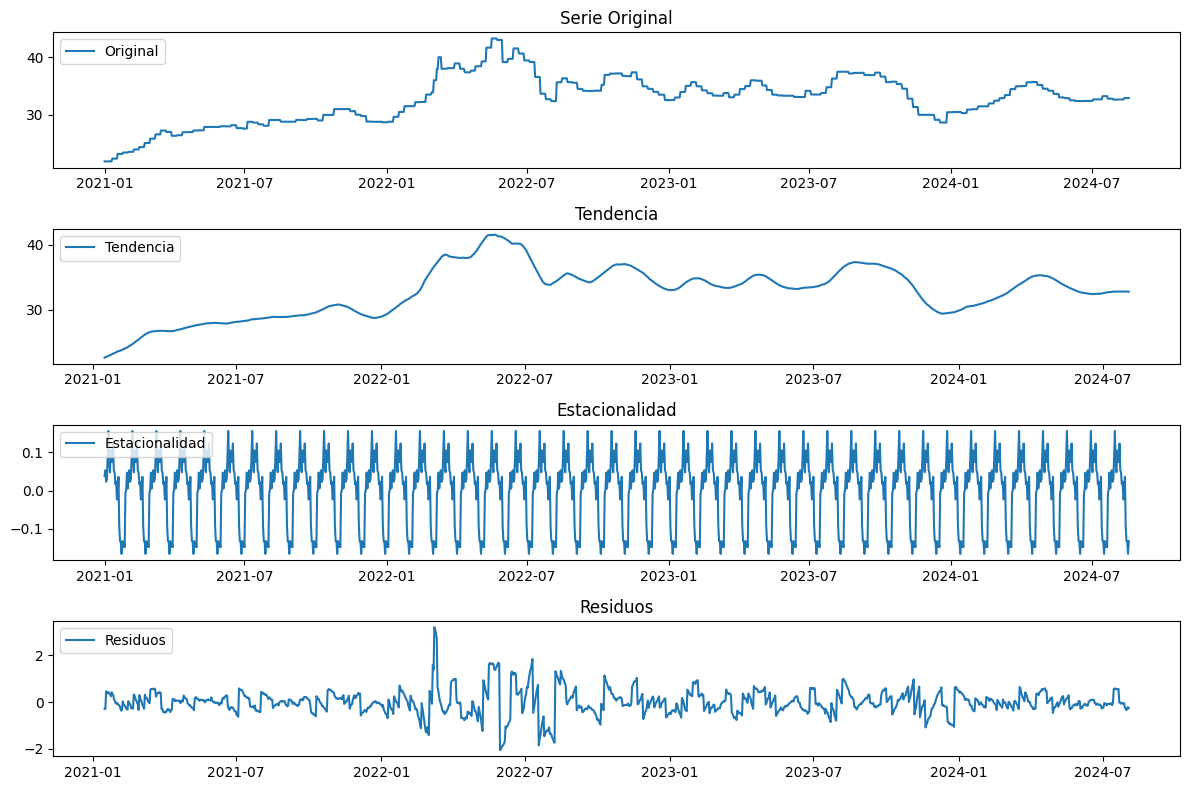

In [75]:
#Descomponga la serie. Teniendo en cuenta el diagrama de la serie y sus  componentes  discuta  si  es  posible  hablar  de  estacionariedad  en  media  y  en  varianza.

from statsmodels.tsa.seasonal import seasonal_decompose

# Descomposición de la serie de tiempo
decomposition = seasonal_decompose(precios_filtered['Gasolina superior'], model='additive', period=31)

# Gráficos de la descomposición
plt.figure(figsize=(12, 8))

# Serie original
plt.subplot(4, 1, 1)
plt.plot(precios_filtered['Fecha'], precios_filtered['Gasolina superior'], label='Original')
plt.legend(loc='upper left')
plt.title('Serie Original')

# Tendencia
plt.subplot(4, 1, 2)
plt.plot(precios_filtered['Fecha'], decomposition.trend, label='Tendencia')
plt.legend(loc='upper left')
plt.title('Tendencia')

# Estacionalidad
plt.subplot(4, 1, 3)
plt.plot(precios_filtered['Fecha'], decomposition.seasonal, label='Estacionalidad')
plt.legend(loc='upper left')
plt.title('Estacionalidad')

# Residuos
plt.subplot(4, 1, 4)
plt.plot(precios_filtered['Fecha'], decomposition.resid, label='Residuos')
plt.legend(loc='upper left')
plt.title('Residuos')

# Ajustar el layout
plt.tight_layout()

# Mostrar los gráficos
plt.show()

In [77]:
#Elejir parametros para el modelo ARIMA
from statsmodels.tsa.stattools import adfuller
# Eliminar índices duplicados y restablecer el índice
precios_filtered = precios_filtered[~precios_filtered.index.duplicated(keep='first')]
precios_filtered = precios_filtered.reset_index(drop=True)

# Diferenciar la serie para hacerla estacionaria
precios_filtered['Gasolina superior_diff'] = precios_filtered['Gasolina superior'].diff().dropna()

# Test de Dickey-Fuller para la serie diferenciada
result_diff = adfuller(precios_filtered['Gasolina superior_diff'].dropna())
print('ADF Statistic (diferenciada):', result_diff[0])
print('p-value (diferenciada):', result_diff[1])
print('Critical Values (diferenciada):', result_diff[4])




ADF Statistic (diferenciada): -5.8572563152846575
p-value (diferenciada): 3.4766058243130094e-07
Critical Values (diferenciada): {'1%': -3.44880082033912, '5%': -2.869670179576637, '10%': -2.5711012838861036}


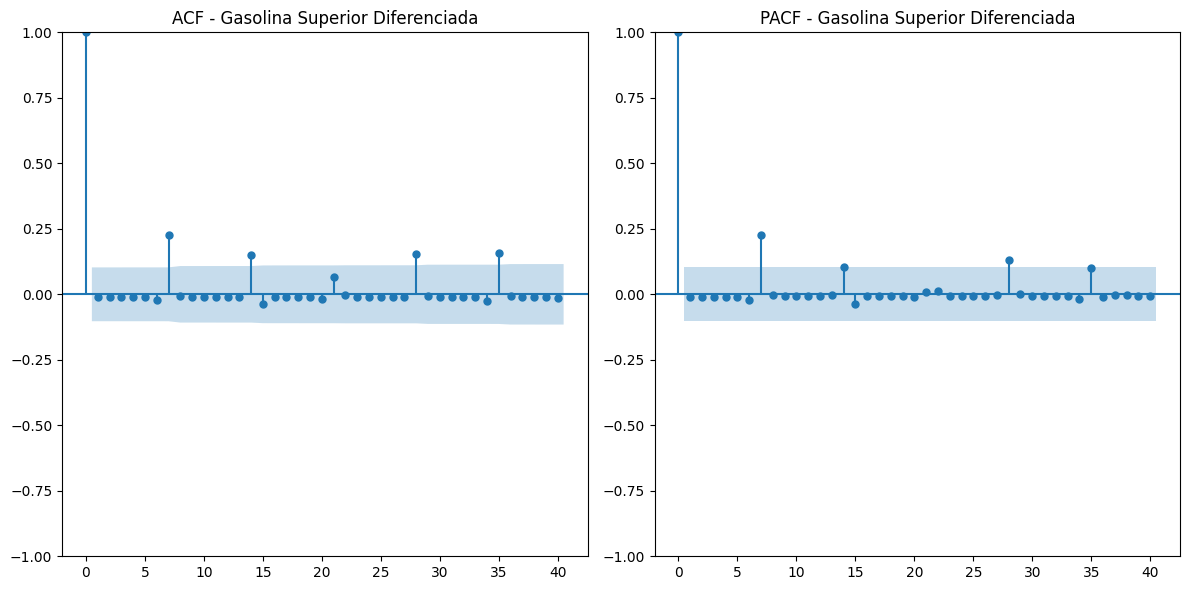

In [108]:
# Graficar ACF y PACF para la serie diferenciada
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_acf(precios_filtered['Gasolina superior_diff'].dropna(), lags=40, ax=plt.gca())
plt.title('ACF - Gasolina Superior Diferenciada')

plt.subplot(1, 2, 2)
plot_pacf(precios_filtered['Gasolina superior_diff'].dropna(), lags=40, ax=plt.gca())
plt.title('PACF - Gasolina Superior Diferenciada')

plt.tight_layout()
plt.show()

In [130]:
#uso de autoarima 
from pmdarima import auto_arima

# Ajustar el modelo ARIMA automático
model = auto_arima(precios_filtered['Gasolina superior'], seasonal=True, m=31)

# Resumen del modelo
print(model.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(0, 2, 1)   Log Likelihood                 115.165
Date:                Sun, 18 Aug 2024   AIC                           -226.331
Time:                        22:28:24   BIC                           -218.542
Sample:                             0   HQIC                          -223.235
                                - 365                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9861      0.013    -76.020      0.000      -1.011      -0.961
sigma2         0.0307      0.001     37.643      0.000       0.029       0.032
Ljung-Box (L1) (Q):                   0.31   Jarque-

In [131]:
# Ajustar el modelo ARIMA con los parámetros p, d, q
p = 0  # Ajusta según el gráfico de PACF
d = 2  # Ya definido como 1 para la diferenciación
q = 1  # Ajusta según el gráfico de ACF

model = ARIMA(precios_filtered['Gasolina superior'], order=(p, d, q))
model_fit = model.fit()

# Resumen del modelo
print(model_fit.summary())




                               SARIMAX Results                                
Dep. Variable:      Gasolina superior   No. Observations:                  365
Model:                 ARIMA(0, 2, 1)   Log Likelihood                 115.165
Date:                Sun, 18 Aug 2024   AIC                           -226.331
Time:                        22:28:41   BIC                           -218.542
Sample:                             0   HQIC                          -223.235
                                - 365                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9861      0.013    -76.020      0.000      -1.011      -0.961
sigma2         0.0307      0.001     37.643      0.000       0.029       0.032
Ljung-Box (L1) (Q):                   0.31   Jarque-

In [114]:
# Verificar el índice actual
print(precios_filtered.index)

# Si 'Fecha' es el índice, restablecer el índice y convertirlo en una columna
if not 'Fecha' in precios_filtered.columns:
    precios_filtered = precios_filtered.reset_index()
    precios_filtered.rename(columns={precios_filtered.columns[0]: 'Fecha'}, inplace=True)


RangeIndex(start=0, stop=365, step=1)


Mean Squared Error: 2.6295136871519063


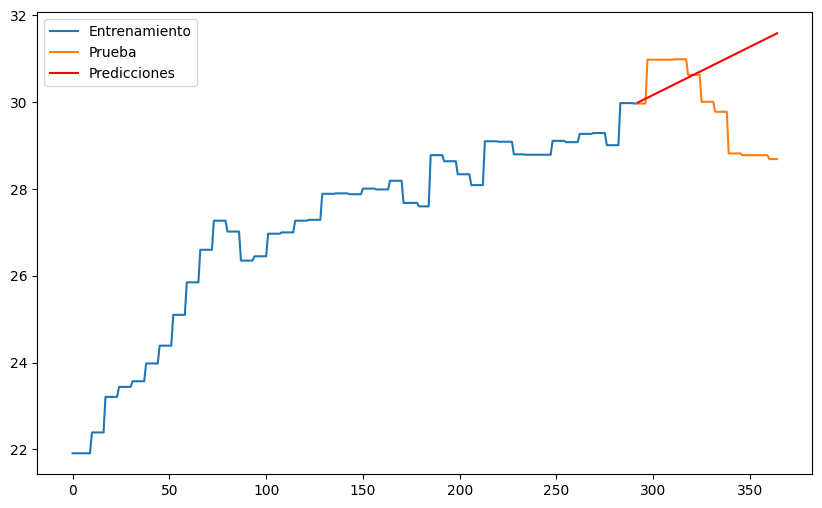

In [133]:
import matplotlib.pyplot as plt

# Ajustar el modelo ARIMA y realizar predicciones
from statsmodels.tsa.arima.model import ARIMA

# Dividir los datos en entrenamiento y prueba
train_size = int(len(precios_filtered) * 0.8)
train, test = precios_filtered['Gasolina superior'][:train_size], precios_filtered['Gasolina superior'][train_size:]

# Ajustar el modelo ARIMA
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()

# Realizar predicciones
predictions = model_fit.forecast(steps=len(test))
error = mean_squared_error(test, predictions)
print(f'Mean Squared Error: {error}')

# Visualizar las predicciones
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Entrenamiento')
plt.plot(test.index, test, label='Prueba')
plt.plot(test.index, predictions, label='Predicciones', color='red')
plt.legend()
plt.show()



# Importaciones de gasolina super 

In [117]:
#identificar el inicio, fin(fecha) y frecuenca de la serie importacion de gasolina super

print("Inicio de la serie de importacion de Gasolina Superior:", importacion_filtered['Fecha'].min())
print("Fin de la serie de importacion de Gasolina Superior:", importacion_filtered['Fecha'].max())
#dame frecuencias de la serie
print("Frecuencia de la serie de importacion de Gasolina Superior:", importacion_filtered['Fecha'].diff().mode().values[0])

Inicio de la serie de importacion de Gasolina Superior: 2001-01-01 00:00:00
Fin de la serie de importacion de Gasolina Superior: 2024-06-01 00:00:00
Frecuencia de la serie de importacion de Gasolina Superior: 2678400000000000 nanoseconds


c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

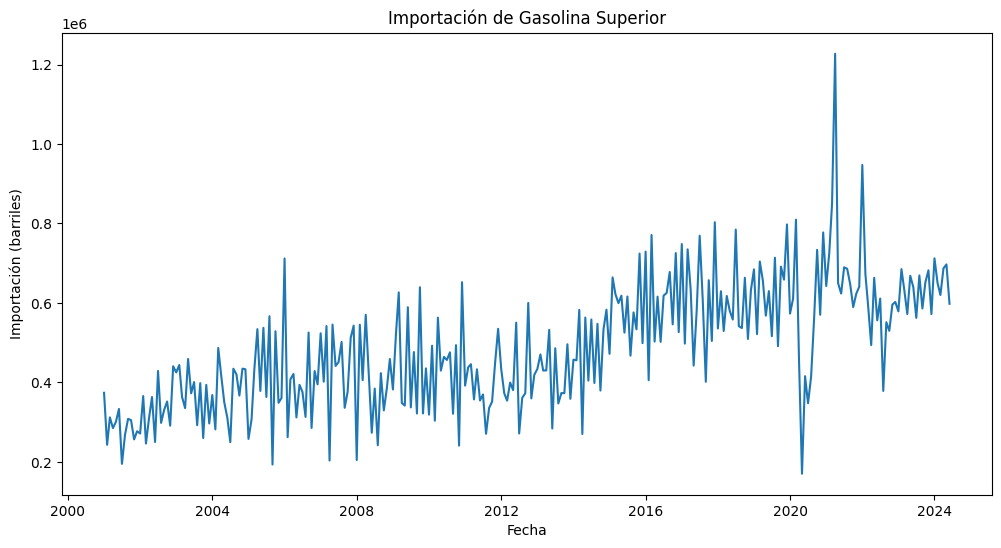

In [118]:
#grafico de la serie
plt.figure(figsize=(12, 6))
sns.lineplot(data=importacion_filtered, x='Fecha', y='Gasolina superior')
plt.title('Importación de Gasolina Superior')
plt.xlabel('Fecha')
plt.ylabel('Importación (barriles)')
plt.show()


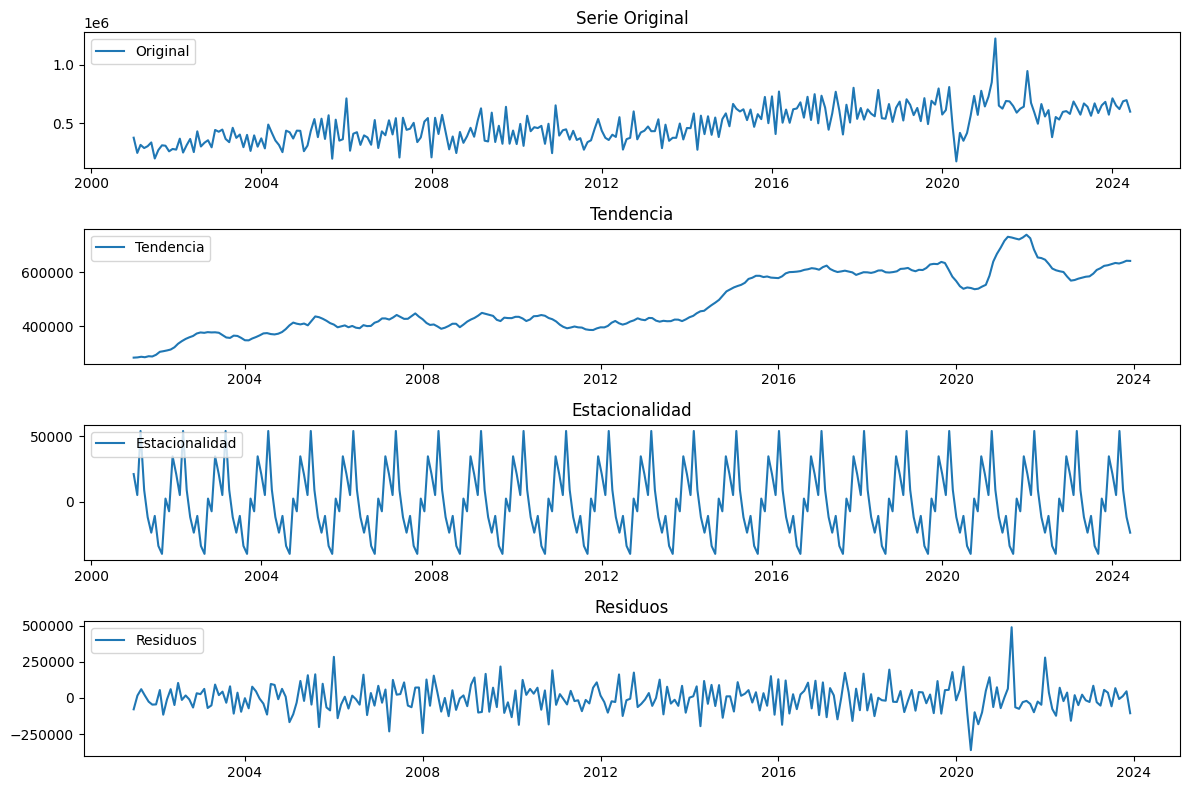

In [120]:

from statsmodels.tsa.seasonal import seasonal_decompose

# Descomposición de la serie de tiempo
decomposition = seasonal_decompose(importacion_filtered['Gasolina superior'], model='additive', period=12)

# Gráficos de la descomposición
plt.figure(figsize=(12, 8))

# Serie original
plt.subplot(4, 1, 1)
plt.plot(importacion_filtered['Fecha'], importacion_filtered['Gasolina superior'], label='Original')
plt.legend(loc='upper left')
plt.title('Serie Original')

# Tendencia
plt.subplot(4, 1, 2)
plt.plot(importacion_filtered['Fecha'], decomposition.trend, label='Tendencia')
plt.legend(loc='upper left')
plt.title('Tendencia')

# Estacionalidad
plt.subplot(4, 1, 3)
plt.plot(importacion_filtered['Fecha'], decomposition.seasonal, label='Estacionalidad')
plt.legend(loc='upper left')
plt.title('Estacionalidad')

# Residuos
plt.subplot(4, 1, 4)
plt.plot(importacion_filtered['Fecha'], decomposition.resid, label='Residuos')
plt.legend(loc='upper left')
plt.title('Residuos')

# Ajustar el layout
plt.tight_layout()

# Mostrar los gráficos
plt.show()

In [121]:
#Elejir parametros para el modelo ARIMA

from statsmodels.tsa.stattools import adfuller
# Diferenciar la serie para hacerla estacionaria
importacion_filtered['Gasolina superior_diff'] = importacion_filtered['Gasolina superior'].diff().dropna()

# Test de Dickey-Fuller para la serie diferenciada
result_diff = adfuller(importacion_filtered['Gasolina superior_diff'].dropna())
print('ADF Statistic (diferenciada):', result_diff[0])
print('p-value (diferenciada):', result_diff[1])
print('Critical Values (diferenciada):', result_diff[4])




ADF Statistic (diferenciada): -7.779135847184585
p-value (diferenciada): 8.509793200411246e-12
Critical Values (diferenciada): {'1%': -3.4548957220044336, '5%': -2.8723451788613157, '10%': -2.572527778361272}


C:\Users\jsken\AppData\Local\Temp\ipykernel_25832\4271607354.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  importacion_filtered['Gasolina superior_diff'] = importacion_filtered['Gasolina superior'].diff().dropna()


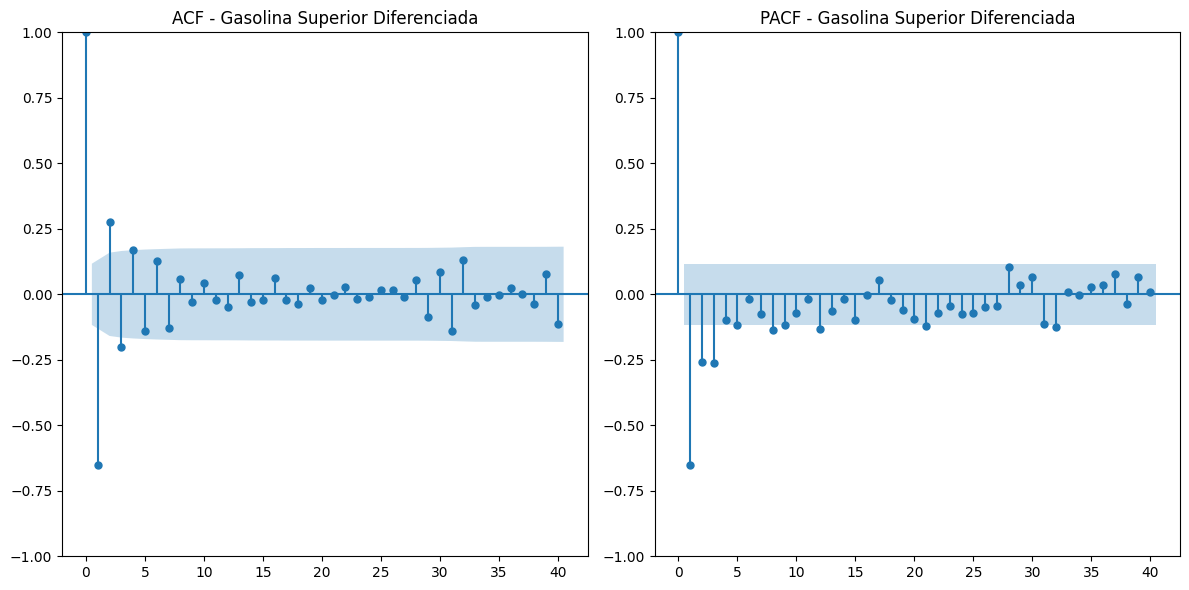

In [122]:
# Graficar ACF y PACF para la serie diferenciada
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_acf(importacion_filtered['Gasolina superior_diff'].dropna(), lags=40, ax=plt.gca())
plt.title('ACF - Gasolina Superior Diferenciada')

plt.subplot(1, 2, 2)
plot_pacf(importacion_filtered['Gasolina superior_diff'].dropna(), lags=40, ax=plt.gca())
plt.title('PACF - Gasolina Superior Diferenciada')

plt.tight_layout()
plt.show()


In [127]:
# Ajustar el modelo ARIMA con los parámetros p, d, q
p = 1  # Ajusta según el gráfico de PACF
d = 1  # Ya definido como 1 para la diferenciación
q = 5  # Ajusta según el gráfico de ACF

#utilizamos auto arima para encontrar los parametros optimos
from pmdarima import auto_arima

# Ajustar el modelo ARIMA
model = auto_arima(importacion_filtered['Gasolina superior'], seasonal=True, m=12, stepwise=True, trace=True)
model.summary()




Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.03 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=7531.506, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=7379.020, Time=0.09 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=7346.649, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=7529.515, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=7344.927, Time=0.04 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=7345.905, Time=0.25 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=7332.309, Time=0.07 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=7333.506, Time=0.16 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=7333.754, Time=0.17 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=7334.665, Time=0.31 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=7377.921, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=7328.710, Time=0.08 sec
 ARIMA(2,1,1)(1,0,0)[12] inte

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  282
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -3657.608
Date:                Sun, 18 Aug 2024   AIC                           7323.215
Time:                        22:22:51   BIC                           7337.769
Sample:                             0   HQIC                          7329.052
                                - 282                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0776      0.062     -1.254      0.210      -0.199       0.044
ar.L2          0.2269      0.072      3.165      0.002       0.086       0.367
ma.L1         -0.9055      0.041    -22.273      0.000      -0.985      -0.826
sigma2      1.272e+10   2.73e-12   4.66e+21      0.000    1.27e+10    1.27e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):               203.84
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               2.02   Skew:                             0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.02e+36. Standard errors may be unstable.
"""

In [124]:
# Verificar el índice actual
print(importacion_filtered.index)

# Si 'Fecha' es el índice, restablecer el índice y convertirlo en una columna
if not 'Fecha' in importacion_filtered.columns:
    importacion_filtered = importacion_filtered.reset_index()
    importacion_filtered.rename(columns={importacion_filtered.columns[0]: 'Fecha'}, inplace=True)

    

RangeIndex(start=0, stop=282, step=1)


Mean Squared Error: 21567787089.634968


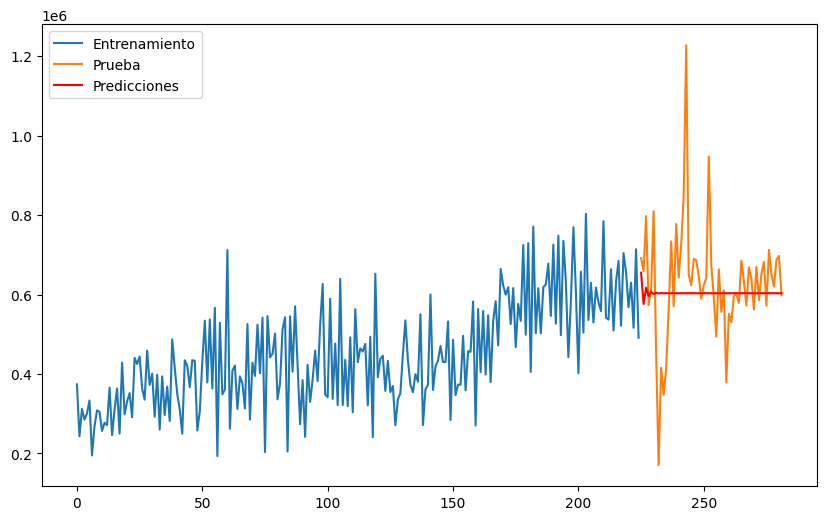

In [129]:
# Ajustar el modelo ARIMA y realizar predicciones
from statsmodels.tsa.arima.model import ARIMA

# Dividir los datos en entrenamiento y prueba
train_size = int(len(importacion_filtered) * 0.8)
train, test = importacion_filtered['Gasolina superior'][:train_size], importacion_filtered['Gasolina superior'][train_size:]

p = 2  # Ajusta según el gráfico de PACF
d = 1  # Ya definido como 1 para la diferenciación
q = 1  # Ajusta según el gráfico de ACF


# Ajustar el modelo ARIMA
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()

# Realizar predicciones
predictions = model_fit.forecast(steps=len(test))

# Calcular el error de predicción
error = mean_squared_error(test, predictions)
print(f'Mean Squared Error: {error}')

# Visualizar las predicciones
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Entrenamiento')
plt.plot(test.index, test, label='Prueba')
plt.plot(test.index, predictions, label='Predicciones', color='red')
plt.legend()
plt.show()

